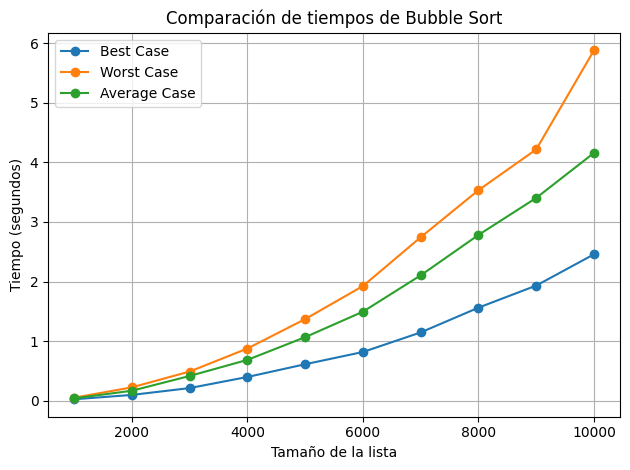

In [1]:
import csv
import random
import time
import matplotlib.pyplot as plt

# ================================================================

'''
Esta parte es la que debes sustituir por tu algoritmo de ordenamiento,
tu algoritmo debe ser una funcion que reciba un parametro arr, el cual es
la lista que va a ordenar, de igual forma la funcion debe tener el mismo nombre que se muestra.
'''

def algoritmo_ordenamiento(arr): # Intenta no modificar esta linea, solo pega tu algoritmo de ordenamiento abajo
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

'''
Si tu algoritmo marca error, checa que la lista que esta ordenando sea arr
y no la que tu hayas puesto, si tu algoritmo recibia otro parametro.
'''

# ================================================================

sizes = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

for i in range(20):  # Repite 20 veces cada caso

    times_best = []
    times_worst = []
    times_avg = []

    for size in sizes:
        # BEST CASE (lista ya ordenada)
        lst_best = list(range(1, size + 1))
        start_time = time.time()
        algoritmo_ordenamiento(lst_best)
        end_time = time.time()
        times_best.append(end_time - start_time)

        # WORST CASE (lista en orden inverso)
        lst_worst = list(range(size, 0, -1))
        start_time = time.time()
        algoritmo_ordenamiento(lst_worst)
        end_time = time.time()
        times_worst.append(end_time - start_time)

        # AVERAGE CASE (lista aleatoria)
        lst_avg = list(range(1, size + 1))
        random.shuffle(lst_avg)
        start_time = time.time()
        algoritmo_ordenamiento(lst_avg)
        end_time = time.time()
        times_avg.append(end_time - start_time)

    # Guardar en CSV: cada fila tendrá las 3 listas separadas
    with open("datos_bubble.csv", "a", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["BEST"] + times_best)
        writer.writerow(["WORST"] + times_worst)
        writer.writerow(["AVERAGE"] + times_avg)
        writer.writerow([f"-------------------- Numero de iteracion {i + 1} --------------------"])

best_results = [[] for _ in sizes]
worst_results = [[] for _ in sizes]
average_results = [[] for _ in sizes]

with open("datos_bubble.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        if row[0] == "BEST":
            for idx, val in enumerate(row[1:]):
                best_results[idx].append(float(val))
        elif row[0] == "WORST":
            for idx, val in enumerate(row[1:]):
                worst_results[idx].append(float(val))
        elif row[0] == "AVERAGE":
            for idx, val in enumerate(row[1:]):
                average_results[idx].append(float(val))

# Promediar los 20 resultados para cada tamaño de lista
best_avg = [sum(vals) / len(vals) for vals in best_results]
worst_avg = [sum(vals) / len(vals) for vals in worst_results]
average_avg = [sum(vals) / len(vals) for vals in average_results]

# Graficar
plt.plot(sizes, best_avg, label="Best Case", marker='o')
plt.plot(sizes, worst_avg, label="Worst Case", marker='o')
plt.plot(sizes, average_avg, label="Average Case", marker='o')

plt.xlabel("Tamaño de la lista")
plt.ylabel("Tiempo (segundos)")
plt.title("Comparación de tiempos de Bubble Sort")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()